# StackingClassifier

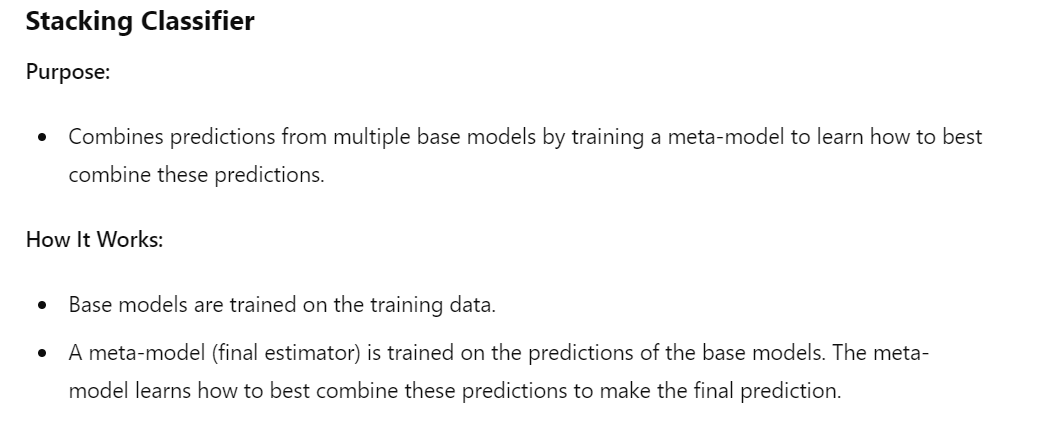

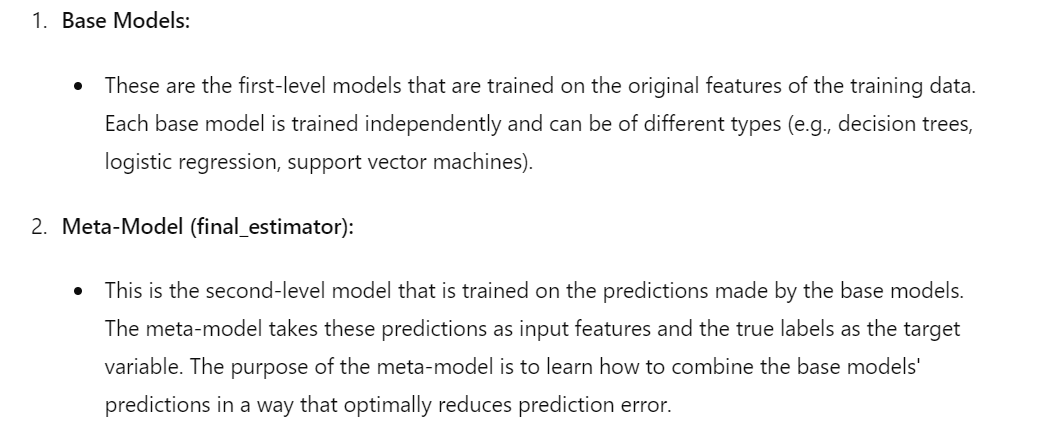

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base models
base_models = [
    ('lr', LogisticRegression(random_state=42 , max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42 , max_iter=1000)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Stacking Classifier Accuracy:", accuracy)

Stacking Classifier Accuracy: 1.0


# VotingClassifier

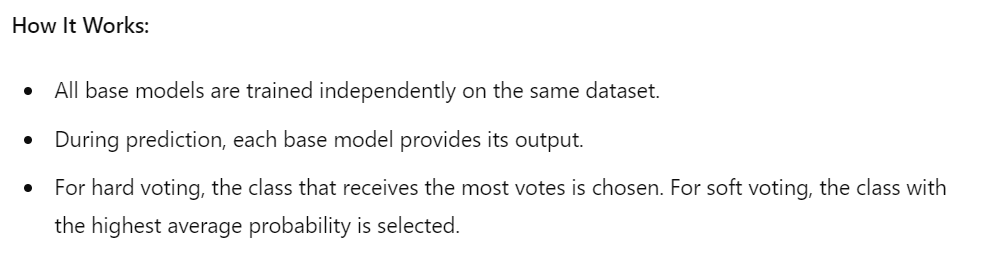

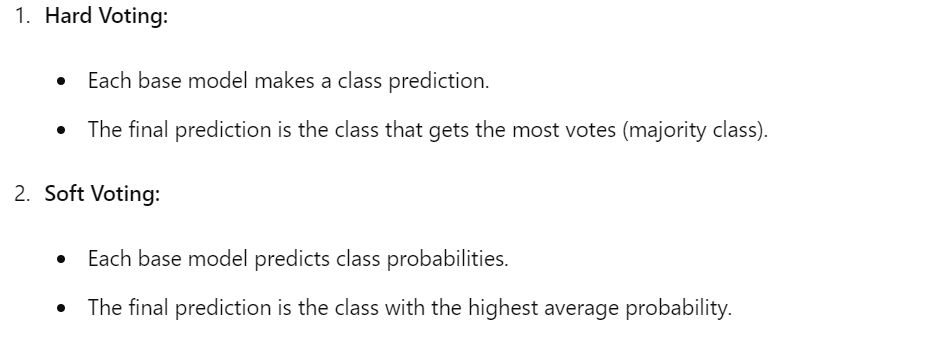

In [7]:
from sklearn.ensemble import VotingClassifier

# Define base models
base_models = [
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]

# Create the voting classifier
voting_clf = VotingClassifier(estimators=base_models, voting='hard') # voting='hard' or voting='soft'

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Voting Classifier Accuracy:", accuracy)


Voting Classifier Accuracy: 1.0


# Bagging (Bootstrap Aggregating)
Bagging involves training multiple models on different bootstrap samples of the data and then aggregating their predictions.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a BaggingClassifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the BaggingClassifier
bagging_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 1.0


#  Boosting
Boosting involves training models sequentially, with each model trying to correct the errors of the previous ones.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the GradientBoostingClassifier
boosting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = boosting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Boosting Classifier Accuracy:", accuracy)

Boosting Classifier Accuracy: 1.0


# Bagging: 

Reduces variance by training multiple models on different subsets of the data and aggregating their predictions.
# Boosting: 

Reduces bias by sequentially training models to correct errors and combining their predictions in a weighted manner.
# Stacking: 

Improves performance by training multiple base models and a meta-model that learns to combine their predictions effectively.

# ***************************************************************

# Difference between VotingClassifier and bagging

# Model Homogeneity:

* Bagging: Typically uses the same type of base model (e.g., multiple decision trees).
* VotingClassifier: Can use different types of models (e.g., logistic regression, decision trees, random forests).

# Data Sampling:

* Bagging: Uses bootstrap samples (sampling with replacement) to create different training datasets for each base model.
* VotingClassifier: Uses the same training dataset for all base models.

# Purpose:

* Bagging: Aims to reduce variance and prevent overfitting by creating diverse training datasets for the same type of model.
* VotingClassifier: Aims to leverage the strengths of different types of models to improve overall performance.

# Aggregation Method:

* Bagging: For classification, uses majority voting; for regression, uses averaging.
* VotingClassifier: Can use hard voting (majority class) or soft voting (average probabilities).